In [184]:
import numpy
import pandas as pd
# import matplotlib

In [185]:
imported = pd.read_csv("C:\\Users\\lolta\\jupyter\\mlda\\labs\\lab02\\lab2_10\\data\\fixed.csv")

In [186]:
imported

,Age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [187]:
active = imported
active['result_bool'] = active['result'].apply(lambda x: True if ">50K" in x else False)
active

,Age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result,result_bool
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,False
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,True
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,False
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,False


In [188]:
countries_cols = active.loc[:, ["native-country", 'result_bool']]
countries = countries_cols.groupby(["native-country"]).aggregate(
    count=pd.NamedAgg(column="native-country",aggfunc="count")
)

countries2 = countries_cols[countries_cols.result_bool == True].groupby(["native-country"]).aggregate(
    count_50K=pd.NamedAgg(column="native-country",aggfunc="count")
)

countries["count_50"] = countries2["count_50K"].astype(int)
countries = countries.fillna(0)
countries["percent"] = countries["count_50"].div(countries["count"]) * 100

In [189]:
countries

,count,count_50,percent
native-country,,,
?,583,146.0,25.042882
Cambodia,19,7.0,36.842105
Canada,121,39.0,32.231405
China,75,20.0,26.666667
Columbia,59,2.0,3.389831
Cuba,95,25.0,26.315789
Dominican-Republic,70,2.0,2.857143
Ecuador,28,4.0,14.285714
El-Salvador,106,9.0,8.490566


In [216]:
education_cols = active.loc[:, ["education-num", 'result_bool', 'education']]
education = education_cols.groupby(["education-num"]).aggregate(
    count=pd.NamedAgg(column="education-num",aggfunc="count")
)

education2 = education_cols[countries_cols.result_bool == True].groupby(["education-num"]).aggregate(
    count_50K=pd.NamedAgg(column="education-num",aggfunc="count")
)

education["count_50"] = education2["count_50K"].astype(int)
education = education.fillna(0.0)
education["percent"] = education["count_50"].div(education["count"]) * 100


df1 = active["education"].unique()
df2 = active["education-num"].unique()
df = pd.DataFrame(df1, df2)
# df1["education-num"] = df1["education-num"]
# for i in range(1, 17):
#     # education.loc[education['education-num']] = active.loc[active['education-num' == i]]
#     print(active.loc[active['education-num'] == i])

In [217]:
df

,0
13,Bachelors
9,HS-grad
7,11th
14,Masters
5,9th
10,Some-college
12,Assoc-acdm
11,Assoc-voc
4,7th-8th
16,Doctorate


In [192]:
age_cols = active.loc[:, ["Age", 'result_bool']]
age = age_cols.groupby(["Age"]).aggregate(
    count=pd.NamedAgg(column="Age",aggfunc="count")
)

age2 = age_cols[age_cols.result_bool == True].groupby(["Age"]).aggregate(
    count_50K=pd.NamedAgg(column="Age",aggfunc="count")
)

age["count_50"] = age2["count_50K"].astype(int)
age = age.fillna(0.0)
age["percent"] = age["count_50"].div(age["count"]) * 100

In [193]:
sex_cols = active.loc[:, ["sex", 'result_bool']]
sex = sex_cols.groupby(["sex"]).aggregate(
    count=pd.NamedAgg(column="sex", aggfunc="count")
)

sex2 = sex_cols[sex_cols.result_bool == True].groupby(["sex"]).aggregate(
    count_50K=pd.NamedAgg(column="sex", aggfunc="count")
)

sex["count_50"] = sex2["count_50K"].astype(int)
sex = sex.fillna(0.0)
sex["percent"] = sex["count_50"].div(sex["count"]) * 100


In [194]:
race_cols = active.loc[:, ["race", 'result_bool']]
race = race_cols.groupby(["race"]).aggregate(
    count=pd.NamedAgg(column="race", aggfunc="count")
)

race2 = race_cols[race_cols.result_bool == True].groupby(["race"]).aggregate(
    count_50K=pd.NamedAgg(column="race", aggfunc="count")
)

race["count_50"] = race2["count_50K"].astype(int)
race = race.fillna(0.0)
race["percent"] = race["count_50"].div(race["count"]) * 100


In [ ]:
race_cols = active.loc[:, ["race", 'result_bool']]
race = race_cols.groupby(["race"]).aggregate(
    count=pd.NamedAgg(column="race", aggfunc="count")
)

race2 = race_cols[race_cols.result_bool == True].groupby(["race"]).aggregate(
    count_50K=pd.NamedAgg(column="race", aggfunc="count")
)

race["count_50"] = race2["count_50K"].astype(int)
race = race.fillna(0.0)
race["percent"] = race["count_50"].div(race["count"]) * 100


In [195]:
age

,count,count_50,percent
Age,,,
17,395,0.0,0.000000
18,550,0.0,0.000000
19,712,2.0,0.280899
20,753,0.0,0.000000
21,720,3.0,0.416667
...,...,...,...
85,3,0.0,0.000000
86,1,0.0,0.000000
87,1,0.0,0.000000


In [196]:
sex

,count,count_50,percent
sex,,,
Female,10771,1179,10.946059
Male,21790,6662,30.573658


In [197]:
race

,count,count_50,percent
race,,,
Amer-Indian-Eskimo,311,36,11.575563
Asian-Pac-Islander,1039,276,26.564004
Black,3124,387,12.387964
Other,271,25,9.225092
White,27816,7117,25.585994


<Axes: xlabel='native-country'>

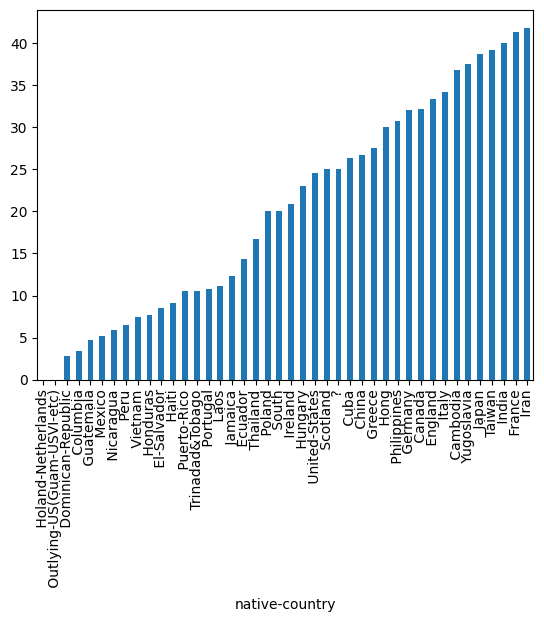

In [198]:
countries.sort_values(by=['percent'])['percent'].plot.bar()

<Axes: title={'center': 'Percent by education'}, xlabel='education num'>

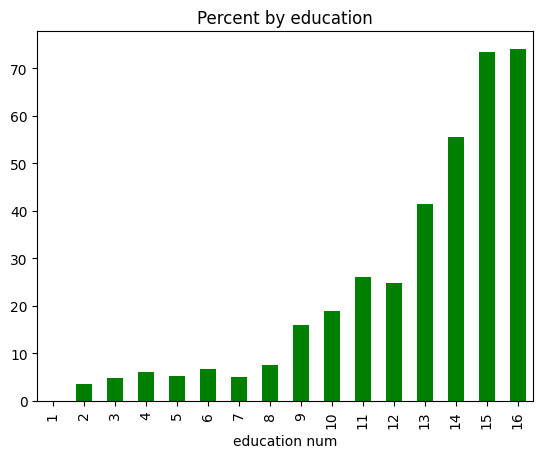

In [199]:
education['percent'].plot.bar(color='green', title='Percent by education', xlabel='education num')

<Axes: xlabel='Age'>

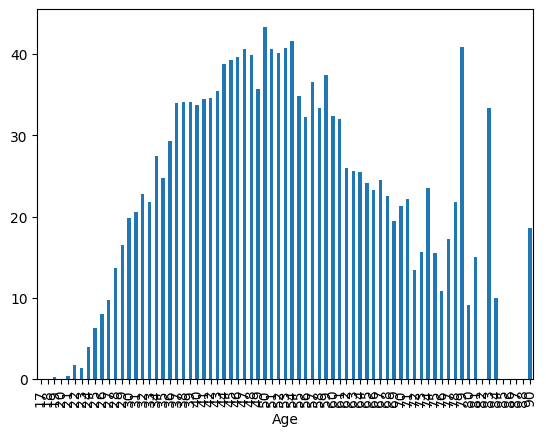

In [223]:
age['percent'].plot.bar()

<Axes: xlabel='sex'>

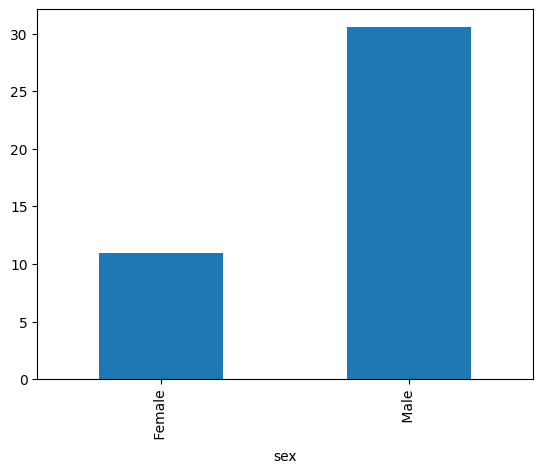

In [201]:
sex['percent'].plot.bar()


<Axes: ylabel='percent'>

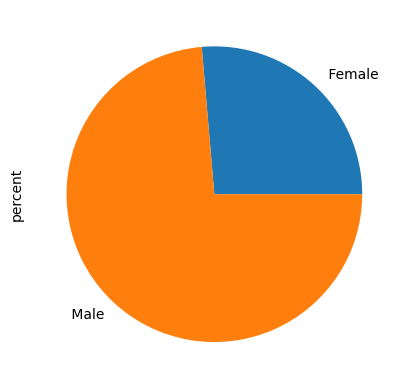

In [202]:
sex['percent'].plot.pie()

<Axes: xlabel='race'>

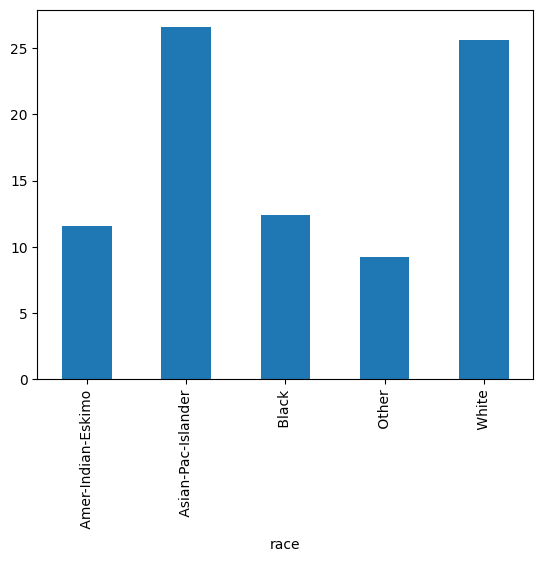

In [203]:
race['percent'].plot.bar()

<Axes: ylabel='percent'>

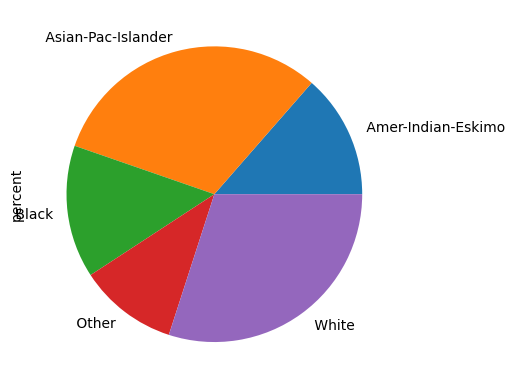

In [204]:
race['percent'].plot.pie()